# **Info 6105 Neural Network Type Classification TMNIST Alphabet**
**Abstract:**

Classifying handwritten digits is a fundamental task in computer vision, essential for applications like optical character recognition and signature verification. While the MNIST dataset has traditionally been the go-to benchmark, it primarily features handwritten digits, potentially limiting its representation of diverse font styles.
The TMNIST dataset, or Typeface MNIST dataset, is an extension of the traditional MNIST dataset widely used in machine learning for handwritten digit classification tasks. While the original MNIST dataset consists of grayscale images of handwritten digits (0-9) from various individuals, the TMNIST dataset introduces a new dimension by incorporating images of digits rendered in different typefaces.
Unlike the uniformity of handwritten digits in the MNIST dataset, the TMNIST dataset contains digits represented in a wide range of typefaces. These typefaces are generated using Google fonts, leading to diverse visual representations of each digit.The TMNIST dataset includes digits rendered in different font styles, such as serif, sans-serif, and decorative fonts. This variation in font styles adds complexity to the classification task and enhances the dataset's representativeness of real-world scenarios where handwritten digits may appear in diverse typographical contexts.Similar to the MNIST dataset, the TMNIST dataset consists of grayscale images with a resolution of 28x28 pixels. Each pixel value represents the intensity of the corresponding pixel in the image, ranging from 0 (black) to 255 (white).
Like MNIST, each image in the TMNIST dataset is associated with a label indicating the digit it represents (0-9). This labeling enables supervised learning algorithms to learn and classify the digits accurately.Overall, the TMNIST dataset offers researchers and practitioners in the field of machine learning a richer and more diverse dataset for developing and testing classification algorithms.



## **About Dataset**

The Typography MNIST (TMNIST) dataset comprises MNIST-style images representing 94 alphabetic characters and digits. These characters include lowercase letters (a-z), uppercase letters (A-Z), and numerical digits (0-9), as well as some special characters like !, ", #, $, %, &, ', (, ), *, +, etc.

The dataset is provided in a single CSV file with specific structure:

The first row contains column headers, including 'names' and 'labels', followed by pixel values from 1 to 784.
The 'names' column contains font file names like 'Acme-Regular' and 'ZillaSlab-Bold'.
The 'labels' column represents the characters corresponding to the images.
The remaining columns contain grayscale pixel values representing the image of the corresponding character in the respective font style.
Containing over 281,000 images, this dataset is a part of the Warhol.ai Computational Creativity and Cognitive Type projects.

Kaggle Link used: https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/







**Importing required Libraries**

In [14]:
#Importing required libraries
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/94_character_TMNIST.csv


**Loaded the Dataset**

In [15]:
import pandas as pd
dftmnist = pd.read_csv('/kaggle/input/94_character_TMNIST.csv')

In [18]:
dftmnist.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The dataset provided a collection of images of various characters generated using different font styles, along with their corresponding pixel values. It can be used for tasks such as character recognition, font style analysis, and machine learning model training.









In [ ]:
dftmnist.shape

(274093, 786)

## Preprocessing the Image Data

In [ ]:
dftmnist['labels'].unique()

array(['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=',
       'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y',
       'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X',
       '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0',
       '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S',
       'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~',
       ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q',
       'L', '!', '\\'], dtype=object)

These above data represent the unique labels present in the dftmnist['labels'] column in the dataset, including alphanumeric characters, symbols, and punctuation marks.

In [ ]:
dftmnist['labels'].nunique()

94

In [ ]:
# Dropping columns that are redundant like names and labels from the training frames and keeping only pixel values
X = dftmnist.drop(columns={'names','labels'}, axis = 1)
y = dftmnist[['labels']]

In [ ]:
labels = dftmnist['labels'].unique()
values = [num for num in range(len(dftmnist['labels'].unique()))]
dict_value_label = dict(zip(values,labels))
dict_label_value = dict(zip(labels,values))

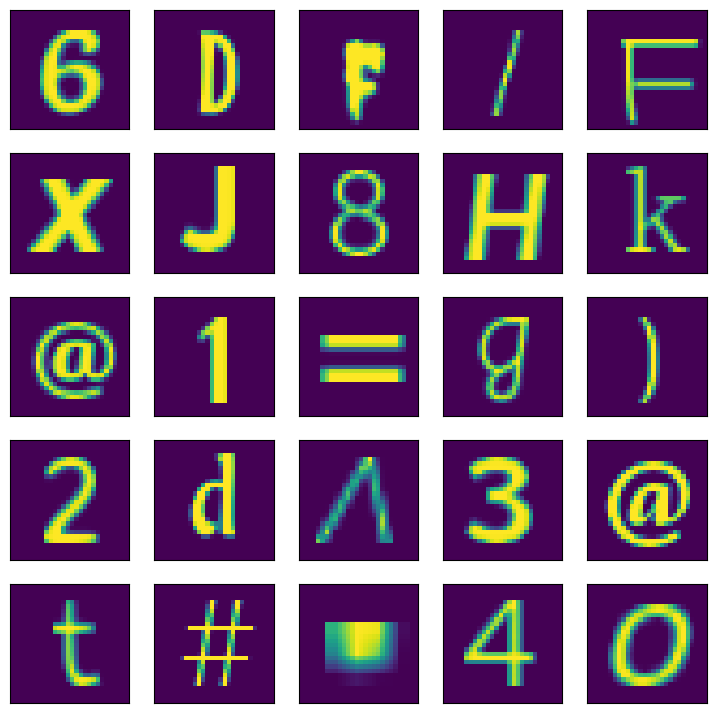

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# X is dataset containing handwritten digit data

# Reshape the data into a 3D array where each entry corresponds to a 28x28 pixel image
X_images = X.values.reshape(-1, 28, 28)  # -1 infers the size of the first dimension, while 28 and 28 are dimensions of the image.

# Create a 5x5 grid of subplots for visualizing the images
fig = plt.figure(figsize=(9, 9))

# Loop through the first 25 images in the reshaped dataset (X_images) and plot them on the subplots
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_xticks([])  # Remove the ticks on the x axis
    ax.set_yticks([])  # Remove the ticks on the y axis
    ax.imshow(X_images[i], cmap='viridis')  # Display the image with the chosen colormap

# Display the grid of images
plt.show()

From the above code image,it allows user to visually inspect a subset of handwritten digit images from the dataset, allowing users to get a quick overview of the data and understand its characteristics.

## Splitting the data in Train and Test Set

In [ ]:
# import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Spliting training set using 80% of data and test set using 20% of data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40) # ensures reproducibility by fixing the random seed

**One-Hot Encoding**

In [ ]:
# Reshape into a 2D array with a single column and apply one-hot encoding
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train = enc.fit_transform(y_train.values.reshape(-1, 1))
y_test = enc.transform(y_test.values.reshape(-1, 1))

# Print the transformed arrays
print("y_train_encoded:", y_train)
print("y_test_encoded:", y_test)

y_train_encoded: [[0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 ...

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]]

y_test_encoded: [[0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 ...

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_train.shape, X_test.shape

((219274, 784), (54819, 784))

In [ ]:
y_train.shape, y_test.shape

((219274, 94), (54819, 94))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Using LabelBinarizer to map characters to numbers
binarizer = LabelBinarizer()
y_train_final = binarizer.fit_transform(y_train)
y_test_final = binarizer.transform(y_test)

# Printing the dimensions of the original train and test labels
print('Train labels dimension:')
print(y_train.shape)
print('Test labels dimension:')
print(y_test.shape)

Train labels dimension:

(219274, 94)

Test labels dimension:

(54819, 94)


In [ ]:
# converting the flattened representation back into a 2D array with dimensions 28 X 28 with 1 color
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

In [ ]:
# Normalizing the Dataset for the Neural Network
X_train, X_test = X_train.astype('float32') / 255., X_test.astype('float32') / 255.

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (219274, 28, 28, 1)

X_test shape: (54819, 28, 28, 1)


## Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

no_of_classes=dftmnist['labels'].nunique()
# Define the model
model = tf.keras.Sequential([
    Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    Dropout(0.25),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    Dropout(0.25),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(no_of_classes, activation='softmax')
])

# Compile the model
optimizer = Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])


# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



## Explaination of the Model

This model is a Convolutional Neural Network (CNN) designed for image classification tasks, specifically for classifying handwritten digits. Let's break down the architecture and its components:

1. The input layer expects grayscale images with dimensions of 28x28 pixels.
2. The model starts with a convolutional layer with 64 filters, each of size 5x5, followed by a rectified linear unit (ReLU) activation function. This layer extracts 64 different features from the input image.Two more convolutional layers follow, each with 32 filters of size 3x3 and ReLU activation. These layers further extract higher-level features from the image.
3. After each convolutional layer, max-pooling layers with a pool size of 2x2 and a stride of 2x2 are applied. Max pooling reduces the spatial dimensions of the feature maps, helping in reducing computational complexity and controlling overfitting.
4. Dropout layers with a dropout rate of 0.25 are inserted after each max-pooling layer. Dropout is a regularization technique that randomly drops a fraction of the neurons during training, reducing the risk of overfitting.
5. The flatten layer converts the 2D feature maps into a 1D vector, preparing the data for the fully connected layers.
6. Two fully connected dense layers follow the flatten layer. The first dense layer has 256 neurons with a ReLU activation function. The second dense layer has neurons equal to the number of classes in the dataset (determined by no_of_classes), with a softmax activation function. Softmax converts the raw output of the network into probability scores for each class, making it suitable for multi-class classification.
7. The model is compiled using the Adam optimizer and categorical cross-entropy loss function. Adam optimizer is a popular choice for gradient-based optimization, and categorical cross-entropy is a standard loss function for multi-class classification problems.

Overall, this CNN model is designed to learn features from handwritten digit images and classify them into one of the distinct classes represented by the labels.


In [ ]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 28, 28, 64)        1664      

                                                                 

 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         

 D)                                                              

                                                                 

 dropout (Dropout)           (None, 14, 14, 64)        0         

                                                                 

 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     

                                                                 

 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         

 g2D)                                                            

                                                                 

 dropout_1 (Dropout)         (None, 7, 7


The provided  convolutional neural network (CNN)model designed for tmnist data classification, specifically tailored for datasets containing grayscale images with a size of 28x28 pixels. It follows a hierarchical feature extraction approach, starting with a Conv2D layer comprising 64 filters and a kernel size of (5, 5), followed by max-pooling to reduce spatial dimensions. Dropout layers are incorporated throughout the network to mitigate overfitting, with a dropout rate of 25%. Subsequent layers repeat this pattern, utilizing Conv2D layers with 32 filters each. The Flatten layer reshapes the feature maps into a one-dimensional array, which is then fed into a densely connected layer with 256 units, employing ReLU activation. Another dropout layer follows before the final output layer, which consists of 94 units corresponding to the number of classes in the dataset. The softmax activation function is applied to the output layer to generate class probabilities. The model has a total of 184,862 trainable parameters, making it suitable for image classification tasks requiring robust feature extraction and classification capabilities while being conscious of overfitting concerns.

In [ ]:
# Train the model with data augmentation
history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test, y_test_final), epochs=30, callbacks=[callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/30

1714/1714 [==============================] - 21s 9ms/step - loss: 0.8887 - accuracy: 0.7489 - val_loss: 0.3574 - val_accuracy: 0.8835

Epoch 2/30

1714/1714 [==============================] - 13s 8ms/step - loss: 0.4247 - accuracy: 0.8652 - val_loss: 0.2904 - val_accuracy: 0.9068

Epoch 3/30

1714/1714 [==============================] - 13s 8ms/step - loss: 0.3533 - accuracy: 0.8896 - val_loss: 0.2594 - val_accuracy: 0.9180

Epoch 4/30

1714/1714 [==============================] - 13s 8ms/step - loss: 0.3203 - accuracy: 0.8988 - val_loss: 0.2329 - val_accuracy: 0.9250

Epoch 5/30

1714/1714 [==============================] - 13s 8ms/step - loss: 0.3003 - accuracy: 0.9046 - val_loss: 0.2255 - val_accuracy: 0.9257

Epoch 6/30

1714/1714 [==============================] - 13s 8ms/step - loss: 0.2844 - accuracy: 0.9091 - val_loss: 0.2152 - val_accuracy: 0.9281

Epoch 7/30

1714/1714 [==============================] - 13s 8ms/step - loss: 0.2747 - accuracy: 0.9123 - val_loss: 0.

In [ ]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)
prediction = binarizer.inverse_transform(prediction)  # Convert class labels to original labels
accuracy = accuracy_score(y_test, prediction) * 100  # Compute accuracy
print(f'Test results - Accuracy: {accuracy}%')

1714/1714 [==============================] - 7s 4ms/step

Test results - Accuracy: 92.77075466535325%


## Model Evaluation

In [ ]:
# Evaluate
result = model.evaluate(X_test, y_test_final, batch_size= 128,verbose=2)
test_accuracy = result[1] * 100
print(f'Test results: {test_accuracy:.2f}%')

429/429 - 2s - loss: 0.1890 - accuracy: 0.9370 - 2s/epoch - 4ms/step

Test results: 93.70%


Model evaluation achieved an accuracy of 93.70%. The evaluation process involved processing the test data in batches, with each epoch taking approximately 2 seconds. Additionally, the model's loss on the test dataset was calculated to be 0.1890. Overall, these results indicate that the model performed well in classifying the test images, achieving a high accuracy while maintaining a relatively low loss.

## Plotting Graphs

**Plotted Accuracy and Loss Graphs**

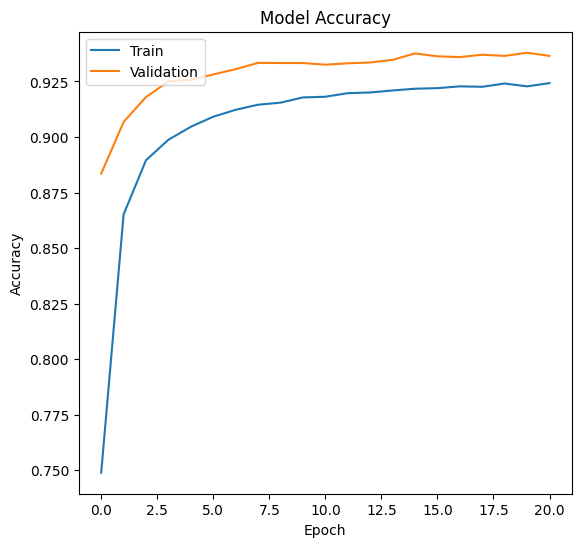

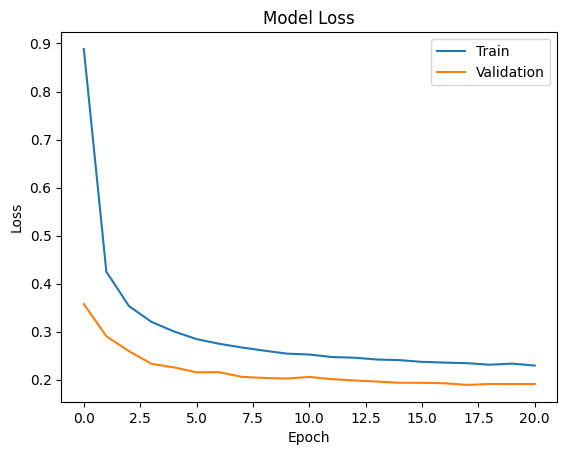

In [ ]:
import numpy as np
# Plot accuracy versus epochs
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss versu epochs
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

Generated visual representations for Accuracy vs Epochs and Loss vs Epochs graphs, to provide a comprehensive overview of model's performance throughout the training process. From these graphs we can visualize model's learning trajectory and improvement over successive epochs. By examining these visualizations, one can identify patterns, trends, and potential areas for enhancement or troubleshooting. This graphical analysis serves as a vital tool for understanding the CNN's training dynamics and optimizing its performance.

**Checking classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support



           0       1.00      0.99      0.99       573

           1       0.99      0.98      0.99       595

           2       0.99      0.99      0.99       574

           3       0.99      0.98      0.98       576

           4       1.00      1.00      1.00       574

           5       0.98      0.96      0.97       591

           6       0.91      0.87      0.89       598

           7       0.98      0.97      0.98       625

           8       0.98      0.98      0.98       597

           9       0.99      0.97      0.98       608

          10       1.00      0.98      0.99       552

          11       0.89      0.93      0.91       573

          12       0.85      0.74      0.79       564

          13       0.96      0.98      0.97       617

          14       0.91      0.98      0.94       573

          15       0.72      0.69      0.70       620

          16       0.94      0.92      0.93       628

        

The classification report provides a comprehensive evaluation of the model's performance across multiple metrics, including precision, recall, and F1-score, for each class in the dataset. Overall, the model demonstrates strong performance, with high precision, recall, and F1-score values across most classes. However, there are very few classes where the model's performance is relatively lower, as indicated by slightly lower precision, recall, and F1-score values. Despite this, the weighted average metrics reflect an overall high level of performance, with an accuracy of 94% on the test dataset.

In [ ]:
!pip install shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.1 MB/s eta 0:00:00a 0:00:01





















**Analyzing Shap Image Plots**

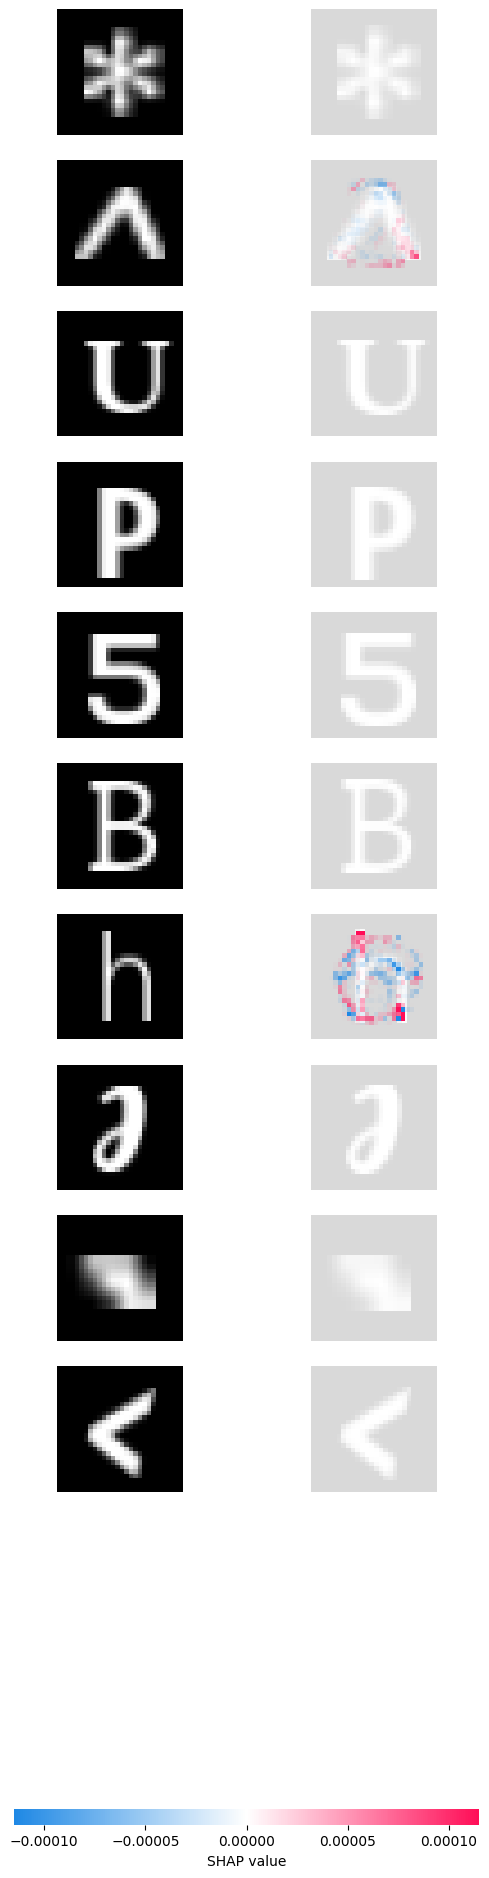

In [ ]:
import shap

# It's important to pass a subset of the training data here for efficiency.
# This subset is used to approximate the expected value of the model.
explainer = shap.DeepExplainer(model, (X_train[:100]))
shap_values = explainer.shap_values(X_test[:10])

# Plot the SHAP values for the first prediction
shap.initjs()
shap.image_plot(shap_values,X_test[:10])

## Conclusion
In conclusion, the model demonstrates strong performance in classifying handwritten characters from the TMNIST dataset, achieving high accuracy and maintaining low loss. Its ability to accurately predict instances across various classes underscores its effectiveness and suitability for real-world applications in optical character recognition and related tasks.The classification report reveals that the model exhibits strong performance across most classes, with high precision, recall, and F1-score values. This indicates that the model accurately predicts instances for the majority of classes in the dataset.From Shap plots also we can verify that the model is correctly predicting the charachters from the TMNIST dataset

## References

Dataset link- https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/

Reference Notebook- https://www.kaggle.com/code/rakshitaj98/info6105-tminst-alphabet/notebook#INFO-6105-Assignment---Type-Classification-|-TMNIST-Alphabet


MIT License

Copyright (c) 2024 Pranali Chipkar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.